# Chapter 2

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
import numpy as np

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Given a list of values, there are several ways to count the frequency of each value.

In [3]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [4]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

In [5]:
p = [1,1,2,2,2,3,3,3,3,3,4,5,5,5,5,6,6,7,7,7,7,7,7,8]
histogram = {}
# for each element of the sequence, increment its corresponding value in 
# histogram by 1
for x in p:
    histogram[x] = histogram.get(x,0) + 1
histogram

{1: 2, 2: 3, 3: 5, 4: 1, 5: 4, 6: 2, 7: 6, 8: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [6]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [7]:
import thinkstats2
hist = thinkstats2.Hist(p)
print(hist)
type(hist)

Hist({1: 2, 2: 3, 3: 5, 4: 1, 5: 4, 6: 2, 7: 6, 8: 1})


thinkstats2.Hist

`Hist` provides `Freq`, which looks up the frequency of a value.

In [8]:
hist.Freq(2)

3

You can also use the bracket operator, which does the same thing.

In [9]:
histogram[2]

3

If the value does not appear, it has frequency 0.

In [10]:
histogram[4]

1

The `Values` method returns the values:

In [11]:
print(hist.Values())
print(hist.d.keys())
hist.d.values()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])
dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


dict_values([2, 3, 5, 1, 4, 2, 6, 1])

In [12]:
print(histogram.keys())
histogram.values()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])


dict_values([2, 3, 5, 1, 4, 2, 6, 1])

So you can iterate the values and their frequencies like this:

In [13]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 2
2 3
3 5
4 1
5 4
6 2
7 6
8 1


In [14]:
for value in sorted(histogram.keys()):
    print(value, histogram[value])

1 2
2 3
3 5
4 1
5 4
6 2
7 6
8 1


Or you can use the `Items` method:

In [15]:
for val, freq in hist.Items():
     print(val, freq)

1 2
2 3
3 5
4 1
5 4
6 2
7 6
8 1


In [16]:
for v,f in histogram.items():
    print(v,f)

1 2
2 3
3 5
4 1
5 4
6 2
7 6
8 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

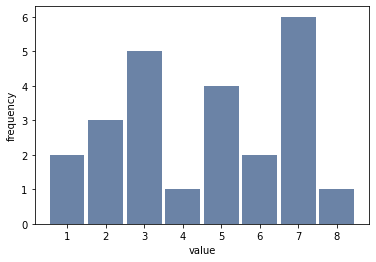

In [17]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [18]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [19]:
import nsfg

In [20]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

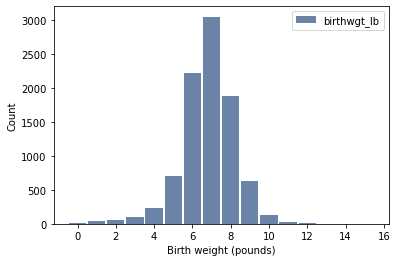

In [21]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [22]:
ages = np.floor(live.agepreg)

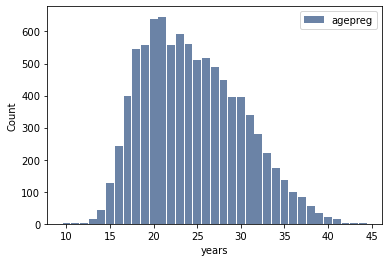

In [23]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

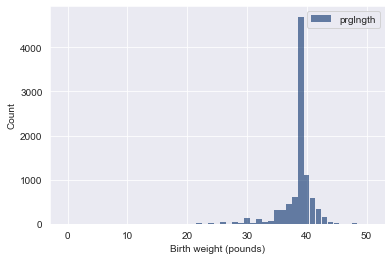

In [51]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [24]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [55]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [54]:
n = 10 
for weeks, freq in sorted(hist.d.items(), reverse=True)[:n]:
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [25]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

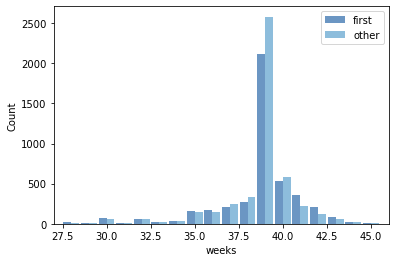

In [26]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [27]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [28]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

Here's are the mean pregnancy lengths for first babies and others:

In [29]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [30]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [31]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

For the next few exercises, we'll load the respondent file:

In [32]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [33]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf).

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

Use Hist.Largest to find the largest values of <tt>parity</tt>.

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

Find the largest parities for high income respondents.

Compare the mean <tt>parity</tt> for high income respondents and others.

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

#### Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn

In [34]:
a = (0, 1, 1, 1, 2, 3, 7, 7, 23)

print(a)
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1
    return hist

counted = count_elements(a)
counted

(0, 1, 1, 1, 2, 3, 7, 7, 23)


{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [35]:
def ascii_histogram(seq) -> None:
    """A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '+' * counted[k]))

ascii_histogram(a)

    0 +
    1 +++
    2 +
    3 +
    7 ++
   23 +


In [36]:
# No NumPy ... yet
import random
random.seed(1)

vals = [1, 3, 4, 6, 8, 9, 10]
# Each number in `vals` will occur between 5 and 15 times.
freq = (random.randint(5, 15) for _ in vals)

data = []
for f, v in zip(freq, vals):
    data.extend([v] * f)

ascii_histogram(data)

    1 +++++++
    3 ++++++++++++++
    4 ++++++
    6 +++++++++
    8 ++++++
    9 ++++++++++++
   10 ++++++++++++


In [37]:
import numpy as np
# `numpy.random` uses its own PRNG.
np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]



array([18.406, 18.087, 16.004, 16.221,  7.358])

In [38]:
hist, bin_edges = np.histogram(d)

print(hist)

bin_edges

[ 13  23  91 261  80  21   7   2   1   1]


array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [39]:
hist.size, bin_edges.size

(10, 11)

In [40]:
 # The leftmost and rightmost bin edges
first_edge, last_edge = min(a), max(a)

print(first_edge)
print(last_edge)

n_equal_bins = 10  # NumPy's default
bin_edges = np.linspace(start=first_edge, stop=last_edge,
                         num=n_equal_bins + 1, endpoint=True)

bin_edges

0
23


array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ])

In [41]:
import numpy as np

bcounts = np.bincount(a)
hist, _ = np.histogram(a, range=(0, max(a)), bins=max(a) + 1)

np.array_equal(hist, bcounts)
True

# Reproducing `collections.Counter`
dict(zip(np.unique(a), bcounts[bcounts.nonzero()]))

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

#### Visualizing Histograms with Matplotlib and Pandas

(0.0, 80.0)

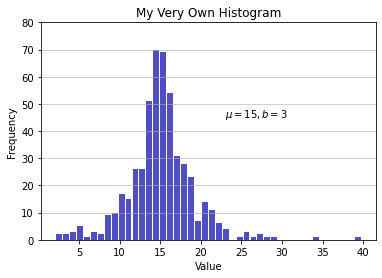

In [42]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

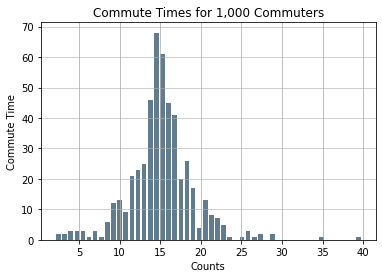

In [43]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

d = pd.Series(d)

d.plot.hist(grid=True, bins=50, rwidth=0.75,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [44]:
# Sample from two different normal distributions
means = 10, 20, 5
stdevs = 4, 2, 1
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1500, 3)),
    columns=['a', 'b','c'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,a,b,c
min,-3.46,13.47,1.46
max,22.30,26.44,8.52
mean,10.06,20.02,4.95
std,3.98,1.99,0.98


Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


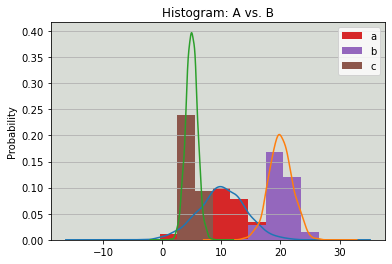

In [45]:
fig, ax = plt.subplots()
print(fig)
print(ax)
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs. B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

[-2.326 -2.308 -2.289 -2.27  -2.252 -2.233 -2.214 -2.196 -2.177 -2.158
 -2.139 -2.121 -2.102 -2.083 -2.065 -2.046 -2.027 -2.009 -1.99  -1.971
 -1.953 -1.934 -1.915 -1.897 -1.878 -1.859 -1.841 -1.822 -1.803 -1.784
 -1.766 -1.747 -1.728 -1.71  -1.691 -1.672 -1.654 -1.635 -1.616 -1.598
 -1.579 -1.56  -1.542 -1.523 -1.504 -1.485 -1.467 -1.448 -1.429 -1.411
 -1.392 -1.373 -1.355 -1.336 -1.317 -1.299 -1.28  -1.261 -1.243 -1.224
 -1.205 -1.187 -1.168 -1.149 -1.13  -1.112 -1.093 -1.074 -1.056 -1.037
 -1.018 -1.    -0.981 -0.962 -0.944 -0.925 -0.906 -0.888 -0.869 -0.85
 -0.832 -0.813 -0.794 -0.775 -0.757 -0.738 -0.719 -0.701 -0.682 -0.663
 -0.645 -0.626 -0.607 -0.589 -0.57  -0.551 -0.533 -0.514 -0.495 -0.476
 -0.458 -0.439 -0.42  -0.402 -0.383 -0.364 -0.346 -0.327 -0.308 -0.29
 -0.271 -0.252 -0.234 -0.215 -0.196 -0.178 -0.159 -0.14  -0.121 -0.103
 -0.084 -0.065 -0.047 -0.028 -0.009  0.009  0.028  0.047  0.065  0.084
  0.103  0.121  0.14   0.159  0.178  0.196  0.215  0.234  0.252  0.271
  0.29  

Text(-2.0, 0.35, '$f(x) = \\frac{\\exp(-x^2/2)}{\\sqrt{2*\\pi}}$')

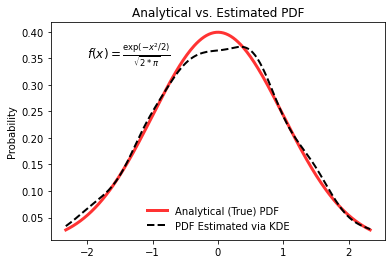

In [46]:
from scipy import stats

# An object representing the "frozen" analytical distribution
# Defaults to the standard normal distribution, N~(0, 1)
dist = stats.norm()

# Draw random samples from the population you built above.
# This is just a sample, so the mean and std. deviation should
# be close to (1, 0).
samp = dist.rvs(size=1000)

# `ppf()`: percent point function (inverse of cdf — percentiles).
x = np.linspace(start=stats.norm.ppf(0.01),
                stop=stats.norm.ppf(0.99), num=250)
gkde = stats.gaussian_kde(dataset=samp)

print(x)
print(max(x))
print(min(x))
print(gkde)

# `gkde.evaluate()` estimates the PDF itself.
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid', c='red', lw=3,
        alpha=0.8, label='Analytical (True) PDF')
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='black', lw=2,
        label='PDF Estimated via KDE')
ax.legend(loc='best', frameon=False)
ax.set_title('Analytical vs. Estimated PDF')
ax.set_ylabel('Probability')
ax.text(-2., 0.35, r'$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}$',
        fontsize=12)

#### A Fancy Alternative with Seaborn

<AxesSubplot:ylabel='Count'>

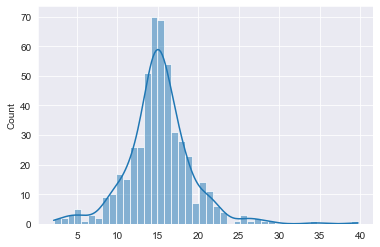

In [47]:
import seaborn as sns

sns.set_style('darkgrid')
#sns.distplot(d)
sns.histplot(d,kde=True)

c:\ProgramData\Anaconda3\envs\ROD_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

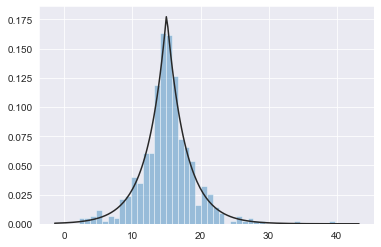

In [48]:
sns.distplot(d, fit=stats.laplace, kde=False)

#### Other Tools in Pandas

In [49]:
import pandas as pd

data = np.random.choice(np.arange(10), size=10000,
                        p=np.linspace(1, 11, 10) / 60)
s = pd.Series(data)

print(s.value_counts())

s.value_counts(normalize=True).head()

9    1818
8    1666
7    1439
6    1278
5    1120
4     932
3     706
2     550
1     344
0     147
dtype: int64


9    0.1818
8    0.1666
7    0.1439
6    0.1278
5    0.1120
dtype: float64

In [50]:
ages = pd.Series(
    [1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52])
bins = (0, 10, 13, 18, 21, np.inf)  # The edges
labels = ('child', 'preteen', 'teen', 'military_age', 'adult')
groups = pd.cut(ages, bins=bins, labels=labels)

print(groups.value_counts())

pd.concat((ages, groups), axis=1).rename(columns={0: 'age', 1: 'group'})

child           6
adult           5
teen            3
military_age    2
preteen         1
dtype: int64


,age,group
0,1,child
1,1,child
2,3,child
3,5,child
4,8,child
5,10,child
6,12,preteen
7,15,teen
8,18,teen
9,18,teen
